In [1]:
# import and init libraries

from pandas import DataFrame, read_csv

import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import sys

import numpy as np

# avoiding type 3 fonts: http://phyletica.org/matplotlib-fonts/
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# enable inline plotting
%matplotlib inline

sns.set(style="ticks")

In [2]:
RP_SOFTWARE = 'imc20/data/rrdp.20200404.dat'

df = pd.read_csv(RP_SOFTWARE,
     delim_whitespace=True,
     header='infer')

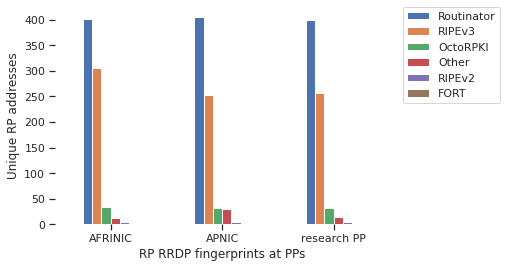

In [3]:
ax = df.plot.bar()

PPs = ['AFRINIC', 'APNIC', 'research PP']

ax.set_ylabel('Unique RP addresses')
ax.set_xlabel('RP RRDP fingerprints at PPs')
ax.grid(False)

ax.set_xticklabels(PPs, rotation='horizontal')
plt.legend(bbox_to_anchor=(1.04,1), borderaxespad=0)
ax.spines["top"].set_visible(False)
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["bottom"].set_visible(False)

# save and explicitly close figure
fig = ax.get_figure()
plt.savefig("imc20/rp-software.pdf", bbox_inches='tight') # tight removes whitespace borders
plt.show()
plt.close(fig)

In [4]:
FORT         = 'imc20/data/rp-software.2019-03-01_2020-04-27.FORT'
OCTORPKI     = 'imc20/data/rp-software.2019-03-01_2020-04-27.OctoRPKI'
OTHER        = 'imc20/data/rp-software.2019-03-01_2020-04-27.Other'
RIPEV2       = 'imc20/data/rp-software.2019-03-01_2020-04-27.RIPEv2'
RIPEV3       = 'imc20/data/rp-software.2019-03-01_2020-04-27.RIPEv3'
Routinator   = 'imc20/data/rp-software.2019-03-01_2020-04-27.Routinator'

fort         = pd.read_csv(FORT,
                names=['Date', 'FORT'],
                parse_dates=['Date'],
                index_col=0)
octorpki     = pd.read_csv(OCTORPKI,
                names=['Date', 'OctoRPKI'],
                parse_dates=['Date'],
                index_col=0)
other        = pd.read_csv(OTHER,
                names=['Date', 'Other'],
                parse_dates=['Date'],
                index_col=0)
ripev2       = pd.read_csv(RIPEV2,
                names=['Date', 'RIPEv2'],
                parse_dates=['Date'],
                index_col=0)
ripev3       = pd.read_csv(RIPEV3,
                names=['Date', 'RIPEv3'],
                parse_dates=['Date'],
                index_col=0)
routinator   = pd.read_csv(Routinator,
                names=['Date', 'Routinator'],
                parse_dates=['Date'],
                index_col=0)

In [5]:
df2 = pd.concat([fort,octorpki,other,ripev2,ripev3,routinator], axis=1, sort=False)

# reindex, fill missing values with -1 (usually you can keep it at nan)
df2.index = pd.to_datetime(df2.index) # make sure you have timestamps
df2 = df2.reindex(pd.date_range("2019-03-01", "2020-04-27", freq="D") )
# df = df.fillna(value=-1)

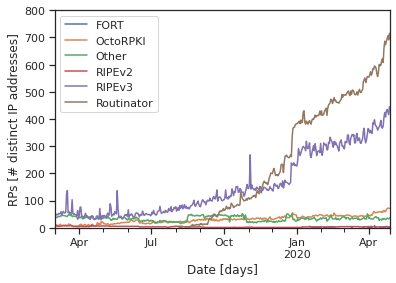

In [6]:
ax2 = df2.plot()
ax2.set_ylabel('RPs [# distinct IP addresses]')
ax2.set_xlabel('Date [days]')
ax2.grid(False)

ax2.set_ylim(0,800)

#ax2.spines["top"].set_visible(False)
#ax2.spines["right"].set_visible(False)
#ax2.spines["bottom"].set_visible(False)
#ax2.spines["left"].set_visible(False)

# annotate interval watermarks
#ax2.annotate('Research PP RRDP re-enabled', xy=('2019-12-25', 350),  xytext=('2019-04-01',335),  arrowprops=dict(facecolor='black', width=2, headwidth=8))
                                                                                           
# save and explicitly close figure
fig2 = ax2.get_figure()
fig2.savefig("imc20/rp-software-longitudinal.pdf", bbox_inches='tight') # tight removes whitespace borders
plt.show()
plt.close(fig2)